In [14]:
# Load packages
import os
import numpy as np
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42 # use only TrueType fonts (required in most IEEE Journals and Conferences)
matplotlib.rcParams["ps.fonttype"] = 42 # 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from load_and_utility_functions import *

# Definitions
path_fig = "./figures/"
save_figure = True # Set to False if you don't want to save the figures as files

### Simple AC Magnitude Plot

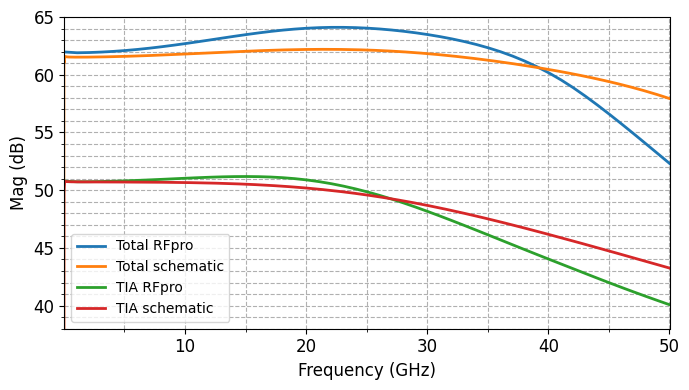

In [58]:
SG25H5_RFpro_AC = np.genfromtxt('./cadence_export/RFpro_AC_transferfunc.vcsv',delimiter=',',skip_header=6)
SG25H5_schem_AC = np.genfromtxt('./cadence_export/schematic_AC.vcsv',delimiter=',',skip_header=6)

#
plt.style.use('default')
fig, ax = plt.subplots(figsize=[7, 4])
ax.plot(SG25H5_RFpro_AC[:,0]/1e9,SG25H5_RFpro_AC[:,3*2+1].T,linewidth=2) # Total RFpro
ax.plot(SG25H5_schem_AC[:,0]/1e9,SG25H5_schem_AC[:,7*2+1].T,linewidth=2) # Total
ax.plot(SG25H5_RFpro_AC[:,0]/1e9,SG25H5_RFpro_AC[:,1*2+1].T,linewidth=2) # TIA RFpro
ax.plot(SG25H5_schem_AC[:,0]/1e9,SG25H5_schem_AC[:,1*2+1].T,linewidth=2) # TIA



#ax.axhline(-3,c='C0',ls="--")
ax.grid(True,which="both",ls="--")
plt.xlim(0.04,50)
plt.ylim(38,65)
plt.xlabel('Frequency (GHz)',fontsize=12)
plt.ylabel('Mag (dB)',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.legend(['Total RFpro','Total schematic','TIA RFpro','TIA schematic'],loc='lower left',fontsize=10)


plt.tight_layout()
if save_figure:
    os.makedirs(path_fig, exist_ok=True)
    plt.savefig(path_fig+"RFpro_vs_schematic_AC_magnitude.pdf")

### Simple Transient Plot

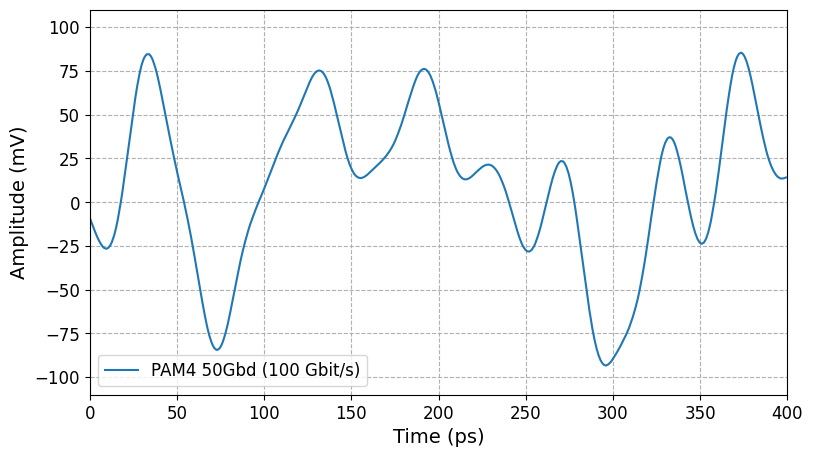

In [62]:
# Load waveform data (time in s, voltage in V)
data = np.genfromtxt('./cadence_export/RFpro_tran_eye_PAM4_50Gbd.vcsv', delimiter=',', skip_header=6)
time_s = data[:, 0]
voltage_v = data[:, 1]

# Define parameters
baud_rate = 50e9  # 50 Gbaud PAM4 → 2 bits/symbol
symbol_period = 1 / baud_rate  # Symbol duration in seconds
plot_window = 20*symbol_period # plot e.g. 10 symbol periods
# Define a start time by yourself!
t_start = 5e-10 # Skip transient + offset
t_end = t_start + plot_window

# Prepare plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 5))
mask = (time_s >= t_start) & (time_s < t_end)
t_window = (time_s[mask] - t_start) * 1e12  # Convert to ps
v_window = voltage_v[mask] * 1e3            # Convert to mV
ax.plot(t_window, v_window)

# ax.set_title("PAM4 50 Gbaud (100 Gbit/s)", fontsize=14) # optional
ax.legend(['PAM4 50Gbd (100 Gbit/s)'],loc='lower left',fontsize=12)
ax.grid(True,which="both",ls="--")
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0, plot_window * 1e12)
plt.ylim(-110,110)
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Amplitude (mV)', fontsize=14)

if save_figure:
    os.makedirs(path_fig, exist_ok=True)
    fig.savefig(os.path.join(path_fig, "RFpro_transient_PAM4_50Gbd.pdf"))

### Eye Diagam

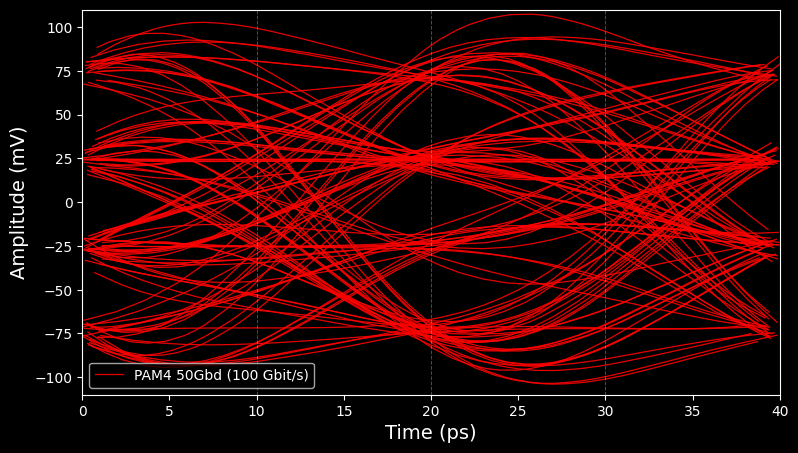

In [64]:
# Load waveform data (time in s, voltage in V)
data = np.genfromtxt('./cadence_export/RFpro_tran_eye_PAM4_50Gbd.vcsv', delimiter=',', skip_header=6)
time_s = data[:, 0]
voltage_v = data[:, 1]

# Define parameters
baud_rate = 50e9  # 50 Gbaud PAM4 → 2 bits/symbol
symbol_period = 1 / baud_rate  # Symbol duration in seconds
eye_periode = 2*symbol_period # Eye-Diagram shows 2 symbol periods
# Define a start time by yourself!
eye_start_time = 5e-10 + 9e-12 #  # Skip transient + eye alignment

# Prepare plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(9, 5))

# Compute number of symbols to display
num_symbols = int(np.floor((time_s[-1] - eye_start_time) * baud_rate))

# Plot each symbol overlay
for idx in range(num_symbols):
    t_start = eye_start_time + idx * eye_periode
    t_end = t_start + eye_periode

    mask = (time_s >= t_start) & (time_s < t_end)
    t_window = (time_s[mask] - t_start) * 1e12  # Convert to ps
    v_window = voltage_v[mask] * 1e3            # Convert to mV

    ax.plot(t_window, v_window, color='red', alpha=0.9, lw=0.9)

# ax.set_title("Eye Diagram: PAM4 50 Gbaud (100 Gbit/s)", fontsize=14) # optional
ax.legend(['PAM4 50Gbd (100 Gbit/s)'],loc='lower left',fontsize=10) 
plt.xlim(0, eye_periode * 1e12)
plt.ylim(-110,110)
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Amplitude (mV)', fontsize=14)

ui_ps = eye_periode * 1e12  # UI in ps
for frac in [0.25, 0.5, 0.75]:
    ax.axvline(frac * ui_ps, color='white', linestyle='--', alpha=0.3, lw=0.7)

if save_figure:
    os.makedirs(path_fig, exist_ok=True)
    fig.savefig(os.path.join(path_fig, "RFpro_tran_eye_PAM4_50Gbd.pdf"))